# Analysis of Crime Data in Cuyahoga County

In [3]:
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from citipy import citipy
import numpy as np
from scipy.stats import linregress

from api_keys import weather_api_key
from api_keys import fbi_key



In [4]:
crime_2017 = pd.read_csv("ocjs_crimebycounty2017.csv")
crime_2017.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OH02538,OHIO DEPT OF NATURAL RESOURCES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OHOHP00,OHIO STATE HGHWAY PATROL,NaN,280,209,3.0,42,6,229,3,157,49,4
2,NaN,TOTAL,NaN,280,209,3.0,42,6,229,3,157,49,4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OH00102,PEEBLES,"1,746",3,3,NaN,NaN,NaN,3,1,1,1,NaN


In [5]:
cuy_crime=crime_2017.loc[153:199, :].reset_index(drop=True)
cuy_crime.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH018A1,NOTRE DAME COLLEGE,NaN,2,38,NaN,2,NaN,NaN,9,29,NaN,NaN
2,OH01801,BAY VILLAGE,"15,327",2,73,NaN,1,NaN,1,11,61,1,NaN
3,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,NaN
4,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,NaN


In [6]:
cuy_crime_null=cuy_crime.fillna(0)
cuy_crime_null.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH018A1,NOTRE DAME COLLEGE,0,2,38,0.0,2,0,0,9,29,0,0
2,OH01801,BAY VILLAGE,"15,327",2,73,0.0,1,0,1,11,61,1,0
3,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,0
4,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,0


In [7]:
cuy_data=cuy_crime_null.drop(cuy_crime_null[cuy_crime_null["POPULATION"]==0].index).reset_index(drop=True)
cuy_data.head()

,ORI,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,OHCLP00,CLEVELAND,"385,351","5,999","18,944",107.0,497,"2,697","2,698","5,853","9,696","3,395",253
1,OH01801,BAY VILLAGE,"15,327",2,73,0.0,1,0,1,11,61,1,0
2,OH01803,BEDFORD,"12,641",25,228,1.0,1,16,7,50,146,32,0
3,OH01804,BEDFORD HEIGHTS,"10,558",22,255,1.0,1,9,11,32,173,50,0
4,OH01806,BEREA,"18,871",8,140,0.0,1,1,6,27,105,8,2


In [8]:
#Summary of cuy_data_df
cuy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORI                 42 non-null     object 
 1   AGENCY NAME         42 non-null     object 
 2   POPULATION          42 non-null     object 
 3   VIOLENT CRIME       42 non-null     object 
 4   PROPERTY CRIME      42 non-null     object 
 5   MURDER              42 non-null     float64
 6   RAPE                42 non-null     object 
 7   ROBBERY             42 non-null     object 
 8   AGGRAVATED ASSAULT  42 non-null     object 
 9   BURGLARY            42 non-null     object 
 10  LARCENY             42 non-null     object 
 11  MTR VEHICLE THEFT   42 non-null     object 
 12  ARSON               42 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.4+ KB


In [9]:
#df.replace(',','', regex=True, inplace=True)
#Remove commas from numerical values to change values to integers
cuy_data.replace(',','', regex=True, inplace=True)
cuy_data.head()

#Option 1:  df["a"] = df["a"].astype(str).astype(int)
#Option 2:  cuy_data["POPULATION"] = cuy_data["POPULATION"].astype(str).astype(int)
#Option 3:  pd.to_numeric(s, errors='coerce')
cuy_data["POPULATION"]=pd.to_numeric(cuy_data["POPULATION"])
cuy_data["VIOLENT CRIME"]=pd.to_numeric(cuy_data["VIOLENT CRIME"])
cuy_data["PROPERTY CRIME"]=pd.to_numeric(cuy_data["PROPERTY CRIME"])
cuy_data["MURDER"]=pd.to_numeric(cuy_data["MURDER"])
cuy_data["RAPE"]=pd.to_numeric(cuy_data["RAPE"])
cuy_data["ROBBERY"]=pd.to_numeric(cuy_data["ROBBERY"])
cuy_data["AGGRAVATED ASSAULT"]=pd.to_numeric(cuy_data["AGGRAVATED ASSAULT"])
cuy_data["BURGLARY"]=pd.to_numeric(cuy_data["BURGLARY"])
cuy_data["LARCENY"]=pd.to_numeric(cuy_data["LARCENY"])
cuy_data["MTR VEHICLE THEFT"]=pd.to_numeric(cuy_data["MTR VEHICLE THEFT"])
cuy_data["ARSON"]=pd.to_numeric(cuy_data["ARSON"])
#Summary of cuy_data_df
cuy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORI                 42 non-null     object 
 1   AGENCY NAME         42 non-null     object 
 2   POPULATION          42 non-null     int64  
 3   VIOLENT CRIME       42 non-null     int64  
 4   PROPERTY CRIME      42 non-null     int64  
 5   MURDER              42 non-null     float64
 6   RAPE                42 non-null     int64  
 7   ROBBERY             42 non-null     int64  
 8   AGGRAVATED ASSAULT  42 non-null     int64  
 9   BURGLARY            42 non-null     int64  
 10  LARCENY             42 non-null     int64  
 11  MTR VEHICLE THEFT   42 non-null     int64  
 12  ARSON               42 non-null     int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 4.4+ KB


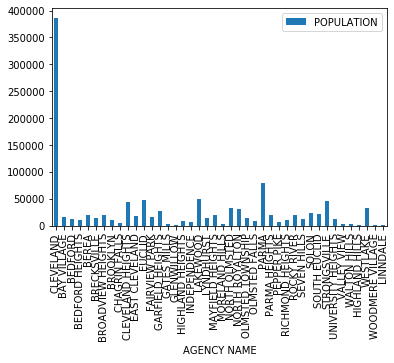

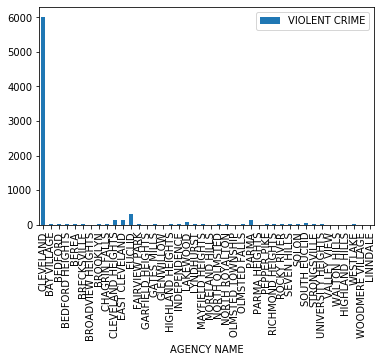

In [10]:
cuy_data.plot.bar(x="AGENCY NAME", y="POPULATION")
cuy_data.plot.bar(x="AGENCY NAME", y="VIOLENT CRIME")

In [11]:
#Comparison of Male vs Female for Violent Crime
url_sex=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/violent-crime/offender/agencies/OHCLP0000/sex?api_key={fbi_key}"
response=requests.get(url_sex).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "category": "Offender demographic",
    "data": [
        {
            "data_year": 2004,
            "key": "Male",
            "month_num": 0,
            "value": 5872
        },
        {
            "data_year": 2005,
            "key": "Male",
            "month_num": 0,
            "value": 6355
        },
        {
            "data_year": 2006,
            "key": "Male",
            "month_num": 0,
            "value": 7195
        },
        {
            "data_year": 2007,
            "key": "Male",
            "month_num": 0,
            "value": 6679
        },
        {
            "data_year": 2008,
            "key": "Male",
            "month_num": 0,
            "value": 6540
        },
        {
            "data_year": 2009,
            "key": "Male",
            "month_num": 0,
            "value": 6141
        },
        {
            "data_year": 2010,
            "key": "Male",
            "month_num": 0,
            "value": 5912
        },
        {
   

In [19]:
#Get Male count for 2017
male_count=response["data"][13]["value"]
male_count

4079

In [21]:
#Get Female count for 2017
female_count=response["data"][28]["value"]
female_count

782

In [22]:
url_race=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/violent-crime/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_race).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "category": "Offender demographic",
    "data": [
        {
            "data_year": 2004,
            "key": "Asian",
            "month_num": 0,
            "value": 4
        },
        {
            "data_year": 2005,
            "key": "Asian",
            "month_num": 0,
            "value": 4
        },
        {
            "data_year": 2006,
            "key": "Asian",
            "month_num": 0,
            "value": 11
        },
        {
            "data_year": 2007,
            "key": "Asian",
            "month_num": 0,
            "value": 8
        },
        {
            "data_year": 2008,
            "key": "Asian",
            "month_num": 0,
            "value": 3
        },
        {
            "data_year": 2009,
            "key": "Asian",
            "month_num": 0,
            "value": 14
        },
        {
            "data_year": 2010,
            "key": "Asian",
            "month_num": 0,
            "value": 1
        },
        {
            "da

In [25]:
#Get Asian count for violent crime
asian_count=response["data"][13]["value"]
asian_count

16

In [27]:
#Get black or African American count for violent crime
black_count=response["data"][43]["value"]
black_count

3986

In [ ]:
#

In [ ]:
#